In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

1. Завдання полягає в тому, щоб побудувати горизонтальну стовпчикову діаграму, на якій відображаються 10 найпопулярніших пісень на Spotify у 2023 році за кількістю прослуховувань.

In [3]:
df = pd.read_csv("spotify-2023.csv", encoding="latin1")
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [4]:
df = df.replace('BPM110KeyAModeMajorDanceability53Valence75Energy69Acousticness7Instrumentalness0Liveness17Speechiness3', np.NaN)

In [5]:
df['streams'] = pd.to_numeric(df['streams'])

In [6]:
df.dtypes

track_name               object
artist(s)_name           object
artist_count              int64
released_year             int64
released_month            int64
released_day              int64
in_spotify_playlists      int64
in_spotify_charts         int64
streams                 float64
in_apple_playlists        int64
in_apple_charts           int64
in_deezer_playlists      object
in_deezer_charts          int64
in_shazam_charts         object
bpm                       int64
key                      object
mode                     object
danceability_%            int64
valence_%                 int64
energy_%                  int64
acousticness_%            int64
instrumentalness_%        int64
liveness_%                int64
speechiness_%             int64
dtype: object

In [7]:
df_2023 = df[df['released_year'] == 2023]

In [8]:
df_2023_top_songs = df_2023.sort_values('streams', ascending=False).head(10)
df_2023_top_songs

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
12,Flowers,Miley Cyrus,1,2023,1,12,12211,115,1.316856e+09,300,...,118,NaN,Major,71,65,68,6,0,3,7
6,Ella Baila Sola,"Eslabon Armado, Peso Pluma",2,2023,3,16,3090,50,7.259801e+08,34,...,148,F,Minor,67,83,76,48,0,8,3
133,"Shakira: Bzrp Music Sessions, Vol. 53","Shakira, Bizarrap",2,2023,1,11,5724,44,7.219756e+08,119,...,122,D,Minor,78,50,63,27,0,9,5
34,TQG,"Karol G, Shakira",2,2023,2,23,4284,49,6.189904e+08,115,...,180,E,Minor,72,61,63,67,0,9,28
9,La Bebe - Remix,"Peso Pluma, Yng Lvcas",2,2023,3,17,2953,44,5.536341e+08,49,...,170,D,Minor,81,56,48,21,0,8,33
49,Die For You - Remix,"Ariana Grande, The Weeknd",2,2023,2,24,3408,47,5.187451e+08,87,...,67,C#,Minor,53,50,53,23,0,44,7
10,un x100to,"Bad Bunny, Grupo Frontera",2,2023,4,17,2876,40,5.056714e+08,41,...,83,F#,Minor,57,56,72,23,0,27,5
16,Cupid - Twin Ver.,Fifty Fifty,1,2023,2,24,2942,77,4.967957e+08,91,...,120,B,Minor,78,76,59,43,0,34,3
160,PRC,"Natanael Cano, Peso Pluma",2,2023,1,23,961,26,4.360279e+08,19,...,138,G,Minor,78,89,83,10,0,12,5
131,OMG,NewJeans,1,2023,1,2,1783,27,4.309775e+08,26,...,127,A,Minor,80,74,77,36,0,11,4


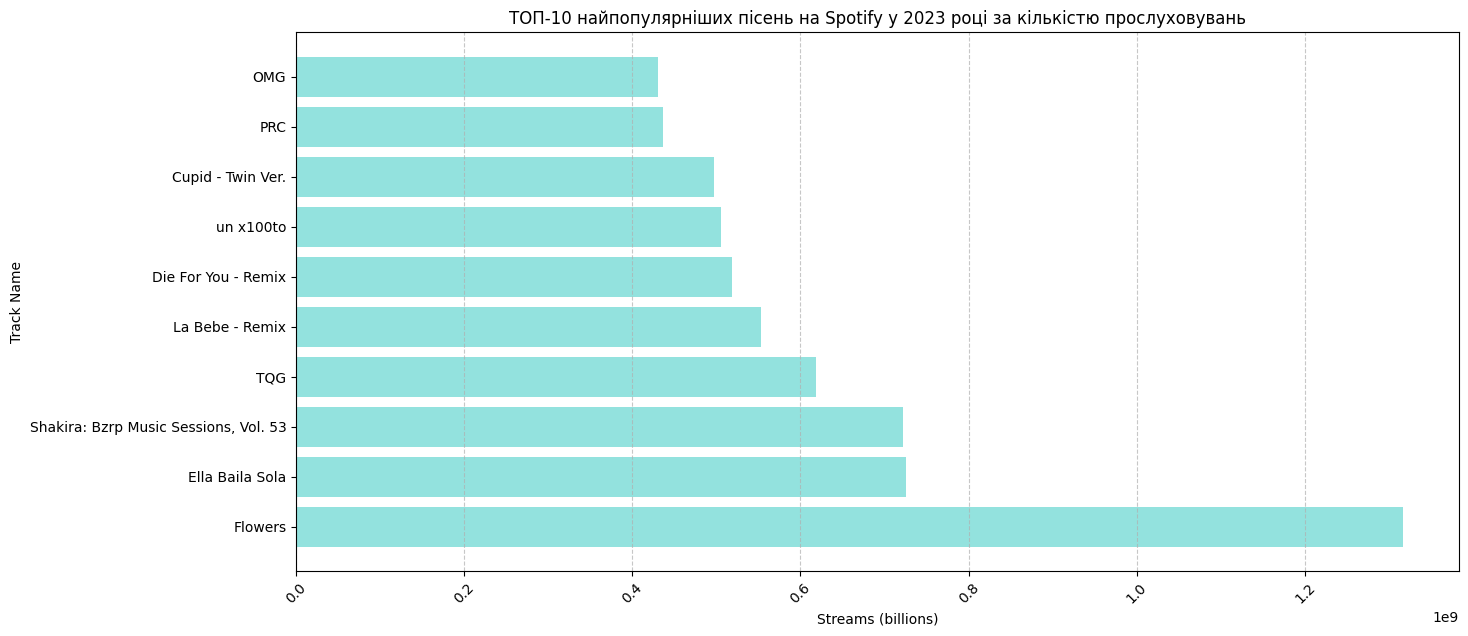

In [9]:
fig, ax = plt.subplots(figsize=[15, 7])
ax.barh(df_2023_top_songs['track_name'], df_2023_top_songs['streams'], color = '#93E2DE')
plt.xlabel('Streams (billions)')
plt.ylabel('Track Name')
plt.title('ТОП-10 найпопулярніших пісень на Spotify у 2023 році за кількістю прослуховувань')
plt.xticks(rotation=45)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

2. Розподіл жанрів найпопулярніших пісень: Створіть кругову діаграму або секторну діаграму, яка відображає розподіл жанрів серед найпопулярніших пісень у 2023 році.

In [255]:
keys = df_2023_top_songs.groupby(['key']).sum()

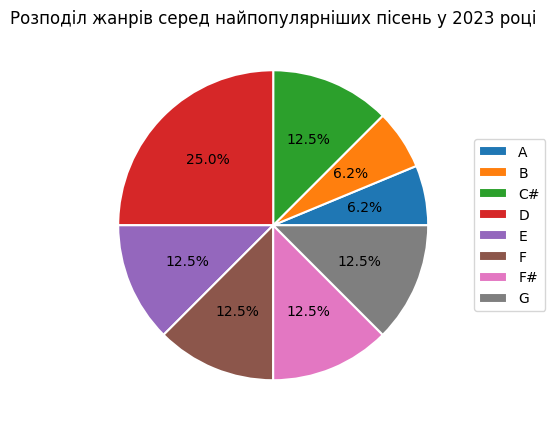

In [256]:
fig, ax = plt.subplots(figsize=[5, 15])
plt.style.use('default')
ax.pie(keys['artist_count'], autopct='%1.1f%%', wedgeprops={"linewidth": 1.5, "edgecolor": "white"})
plt.title("Розподіл жанрів серед найпопулярніших пісень у 2023 році")
ax.legend(list(keys.index), loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

3. Динаміка популярності треку в залежності від часу: Побудуйте лінійний графік, який відображає зміни кількості прослуховувань певного треку протягом року 2023 року.

In [257]:
# Оскільки у таблиці немає даних для побудови динаміки прослуховувань певного треку, я побудувала графік динаміки прослуховувань 
# певного виконавця.

In [258]:
df_2023.rename(columns = {'released_year':'year','released_month':'month','released_day':'day'}, inplace=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16420\1600321147.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023.rename(columns = {'released_year':'year','released_month':'month','released_day':'day'}, inplace=True)


In [259]:
df_2023_Wallen = df_2023[df_2023['artist(s)_name'] == 'Morgan Wallen']
df_2023_Wallen['date'] = pd.to_datetime(df_2023_Wallen[['year', 'month', 'day']])
df_2023_Wallen = df_2023_Wallen[['track_name', 'streams', 'date']].sort_values('date')
df_2023_Wallen

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16420\4117505078.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023_Wallen['date'] = pd.to_datetime(df_2023_Wallen[['year', 'month', 'day']])


,track_name,streams,date
28,Last Night,429829812.0,2023-01-31
339,Everything I Love,95623148.0,2023-01-31
343,I Wrote The Book,83021468.0,2023-01-31
336,Ainï¿½ï¿½ï¿½t Tha,88791109.0,2023-03-03
337,Thinkinï¿½ï¿½ï¿½ B,125917280.0,2023-03-03
355,ýýý98 Braves,56533272.0,2023-03-03
373,Born With A Beer In My Hand,34450974.0,2023-03-03
379,Devil Donï¿½ï¿½ï¿½,32526947.0,2023-03-03


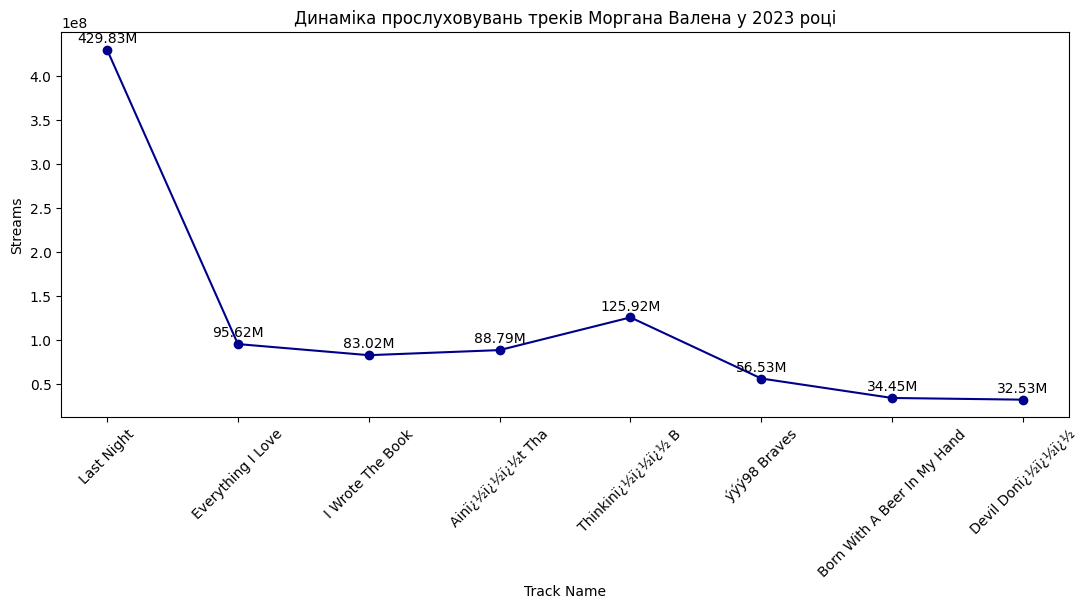

In [260]:
fig, ax = plt.subplots(figsize=[13, 5])

x_values = df_2023_Wallen['track_name']
y_values = df_2023_Wallen['streams']

ax.plot(x_values, y_values, color = '#00008B', marker = 'o')
plt.xlabel('Track Name')
plt.ylabel('Streams')

for x,y in zip(x_values,y_values):
    label = '{:,.2f}M'.format(y / 1000000)

    plt.annotate(label, (x,y), textcoords="offset points", xytext=(0,5), ha='center')

plt.title('Динаміка прослуховувань треків Моргана Валена у 2023 році')
plt.xticks(rotation=45)
plt.show()

4. Рейтинг артистів на Spotify: Створіть стовпчикову діаграму, на якій відображаються 10 найпопулярніших артистів на Spotify у 2023 році за кількістю слухачів.

In [261]:
df_2023_artists = df_2023.groupby('artist(s)_name')['streams'].sum()
df_2023_top_artists = df_2023_artists.sort_values(ascending = False).head(10)
df_2023_top_artists

artist(s)_name
Miley Cyrus                   1.316856e+09
Morgan Wallen                 9.466940e+08
Eslabon Armado, Peso Pluma    7.259801e+08
Shakira, Bizarrap             7.219756e+08
Jimin                         7.054457e+08
Fifty Fifty                   6.364776e+08
Karol G, Shakira              6.189904e+08
Peso Pluma, Yng Lvcas         5.536341e+08
NewJeans                      5.187948e+08
Ariana Grande, The Weeknd     5.187451e+08
Name: streams, dtype: float64

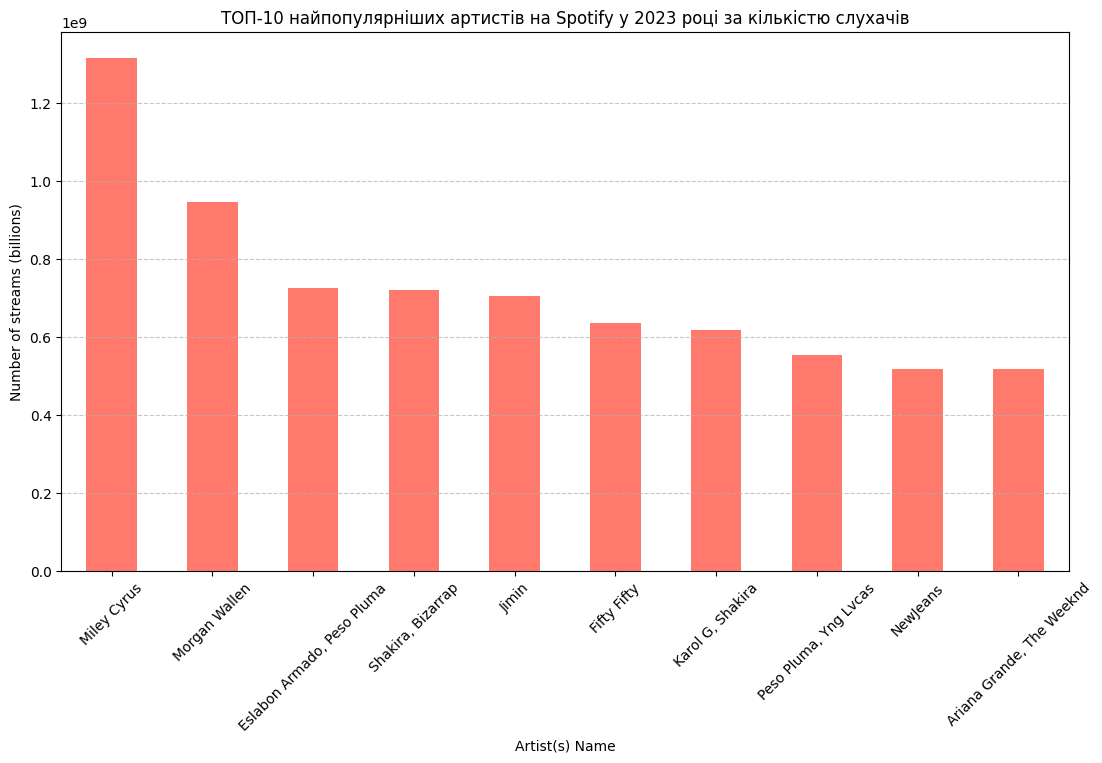

In [262]:
fig, ax = plt.subplots(figsize=[13, 7])
bar_artists = df_2023_top_artists.plot(kind='bar', color='#FF796C')
plt.xlabel('Artist(s) Name')
plt.ylabel('Number of streams (billions)')
plt.title('ТОП-10 найпопулярніших артистів на Spotify у 2023 році за кількістю слухачів')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

5. Порівняння популярності трьох треків: Побудуйте горизонтальну стовпчикову діаграму, яка порівнює кількість прослуховувань трьох конкретних треків у 2023 році.

In [263]:
df_2023_three_tracks = df_2023[(df_2023['track_name'] == 'Daylight') | \
                               (df_2023['track_name'] == 'Hits Different') | \
                               (df_2023['track_name'] == "Mine (Taylor's Version)")]
df_2023_three_tracks = df_2023_three_tracks[['track_name', 'streams']]
df_2023_three_tracks

,track_name,streams
13,Daylight,387570742.0
113,Mine (Taylor's Version),36912123.0
206,Hits Different,68616963.0


In [264]:
def formated_label(num):
    num = '{:,.2f}M'.format(num / 1000000)
    return num

In [265]:
little_strems = [formated_label(num) if num < 300000000 else '' for num in list(df_2023_three_tracks['streams'])]
a_lot_streams = [formated_label(num) if num > 300000000 else '' for num in list(df_2023_three_tracks['streams'])]

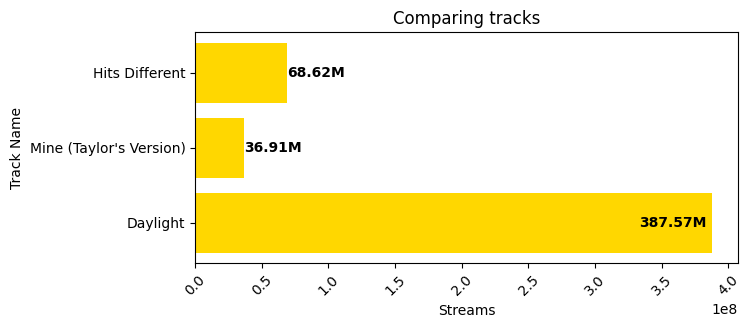

In [266]:
fig, ax = plt.subplots(figsize=[7, 3])
bar_container = ax.barh(df_2023_three_tracks['track_name'], df_2023_three_tracks['streams'], color = '#FFD700')
plt.xlabel('Streams')
plt.ylabel('Track Name')
ax.bar_label(bar_container, labels=little_strems, color = 'black', weight = 'bold')
ax.bar_label(bar_container, labels=a_lot_streams, padding=-52, color = 'black', weight = 'bold')
plt.title('Comparing tracks')
plt.xticks(rotation=45)
#plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()